# RL trainer

A class of trainer takes evnironment and agent as input. Make agent and environment interact between each other.

Gather training data from interaction and update agent accordingly.

In [1]:
import sys
sys.path.append('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/codes/')
import warnings
warnings.filterwarnings("ignore")
from module.backtesting_old import vectorized_backtesting
from module.environment_new import market_environment
from module.agent_network_new import DQNAgent
from module.RL_trainer import training, testing, is_converge
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf

## Turnover evaluation

In [3]:
# hyper-parameter
np.random.seed(2021)
tf.random.set_seed(1234)
window_size = 4
year_start = 1997
year_end = 2017
year_range = np.arange(year_start, year_end+1)
training_idx_list = [np.arange(year, year + window_size, 1) for year in year_range[:-window_size]]
batch_size = 6
performance_df = pd.DataFrame()

In [4]:
training_idx_list[0]

array([1997, 1998, 1999, 2000])

In [6]:
training_years = training_idx_list[0]
agent, history = training(training_years)

 26%|██▌       | 257/1000 [02:18<06:41,  1.85it/s]


KeyboardInterrupt: 

In [4]:
testing_period = np.append(training_years, training_years[-1] + 1)

# initialize environment and agent
env = market_environment(testing_period)
ACTION_MAPPING = env.ACTION_MAPPING
state_size = env.observation_space.shape[1] # given from environment
action_size = len(ACTION_MAPPING)
agent = DQNAgent(state_size, action_size)
agent.epsilon = 0
performance = {'year':testing_period[-1],'action': [], 'reward': [], 'turnover': []}

# initialize state
state = env.reset()

In [5]:
state

array([[-0.26477052,  0.05026257,  0.5024553 , -0.0283973 ,  0.30226526,
         0.38175784,  0.20023601,  0.37967333,  0.59796124,  0.38403208,
         0.31960737,  0.27742515,  0.07836132,  0.02090924,  0.3328392 ,
         0.50228046, -0.35955854,  0.43324582,  0.35683725,  0.18608985,
         0.37447422,  0.48275691,  0.59121332,  0.23256702]])

In [13]:
stocks_returns = env.stocks_returns_aggregate.loc[2000]
stocks_mean_returns = np.mean(stocks_returns.values) * 252

In [10]:
env.get_stock_mean_returns(2000)

0.07586233879360256

In [27]:
# take an action
action = agent.act(state) 

# environment responds to the action and return new state and reward
next_state, reward, done, info = env.step(ACTION_MAPPING[action])

# transit to next state
state = next_state

# determine if the testing is over or not
if done:
    performance['action'] = ACTION_MAPPING[action]
    performance['reward'] = reward
    performance['turnover'] = env.get_turn_over_for_each_period()[-1]
    
    print('done')

done


## PG agent

In [2]:
# hyper-parameter
np.random.seed(2021)
tf.random.set_seed(1234)
window_size = 4
year_start = 1997
year_end = 2017
year_range = np.arange(year_start, year_end+1)
training_idx_list = [np.arange(year, year + window_size, 1) for year in year_range[:-window_size]]
batch_size = 6
performance_df = pd.DataFrame()

# initialize environment and agent
env = market_environment(year_range)
ACTION_MAPPING = env.ACTION_MAPPING
state_size = env.observation_space.shape[1] # given from environment
action_size = len(ACTION_MAPPING)
agent = PGAgent(state_size, action_size)
EPISODE_RANGE = 1000
converge = False
window_size = 50
history = {'episode': [], "epsilon": [],'rewards': []}
path = '../log/'
model_name = 'DQN_'

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             [(None, 24)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           600         states[0][0]                     
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           600         dense[0][0]                      
__________________________________________________________________________________________________
rewards (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

## DQN agent

In [2]:
# hyper-parameter
np.random.seed(2021)
tf.random.set_seed(1234)
window_size = 4
year_start = 1997
year_end = 2017
year_range = np.arange(year_start, year_end+1)
training_idx_list = [np.arange(year, year + window_size, 1) for year in year_range[:-window_size]]
performance_df = pd.DataFrame()

# training
for training_years in training_idx_list:
    #training_years = training_idx_list[0]
    agent, history = training(training_years)

    # testing
    testing_period = np.append(training_years, training_years[-1] + 1)
    performance = testing(testing_period, agent)

    # store performance data
    performance_test = pd.DataFrame(performance)
    performance_df = pd.concat([performance_df, performance_test])


 35%|███▌      | 350/1000 [02:46<05:09,  2.10it/s]

Converged on episode 351



 45%|████▌     | 450/1000 [03:31<04:18,  2.13it/s]

Converged on episode 451



 10%|█         | 100/1000 [00:46<06:56,  2.16it/s]

Converged on episode 101



 95%|█████████▌| 950/1000 [08:32<00:26,  1.86it/s]

Converged on episode 951



100%|██████████| 1000/1000 [09:16<00:00,  1.80it/s]


In [3]:
performance_df

,year,action,reward,turnover
0,2001,0.0,-0.234505,0.358680
0,2002,0.8,-0.571951,0.404634
0,2003,0.0,1.858682,0.706194
0,2004,0.0,0.979907,0.603836
0,2005,0.6,-0.484751,0.841653
0,2006,0.9,1.307949,0.234111
0,2007,0.2,0.579177,0.423085
0,2008,0.6,-0.586461,0.391979
0,2009,0.3,0.585745,0.699401
0,2010,0.2,0.423904,0.769875


In [13]:
env = market_environment(year_range)
env.tbn_combined.loc[1997]

,1447,1602,1690,2136,2285,2817,2991,3144,3243,3980,...,7154,7257,7435,7906,8762,10903,11259,11264,12141,20779
1447,1.0000,0.0213,0.0308,0.0526,0.0212,0.0000,0.0661,0.0207,0.0447,0.0217,...,0.0000,0.0203,0.0468,0.0000,0.1020,0.0404,0.0100,0.0611,0.0484,0.0000
1602,0.0213,1.0000,0.0083,0.0047,0.0083,0.0000,0.0364,0.0070,0.0000,0.0029,...,0.0601,0.0265,0.0479,0.0000,0.0866,0.0050,0.0000,0.0000,0.0218,0.0642
1690,0.0308,0.0083,1.0000,0.0197,0.0059,0.0000,0.0000,0.0000,0.0000,0.0301,...,0.0000,0.0000,0.0023,0.0000,0.0097,0.0000,0.0000,0.1030,0.0523,0.0006
2136,0.0526,0.0047,0.0197,1.0000,0.0000,0.0000,0.0540,0.0186,0.0023,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0523,0.0000,0.0000,0.0045,0.0576,0.0899
2285,0.0212,0.0083,0.0059,0.0000,1.0000,0.0092,0.0192,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0039,0.0003,0.0263,0.0000
2817,0.0000,0.0000,0.0000,0.0000,0.0092,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2991,0.0661,0.0364,0.0000,0.0540,0.0192,0.0000,1.0000,0.0436,0.0262,0.0212,...,0.0000,0.0100,0.0305,0.0129,0.0000,0.0371,0.0000,0.0000,0.0162,0.0725
3144,0.0207,0.0070,0.0000,0.0186,0.0000,0.0000,0.0436,1.0000,0.0155,0.0122,...,0.0000,0.0000,0.0660,0.0011,0.0000,0.0318,0.0227,0.0000,0.0000,0.0540
3243,0.0000,0.0642,0.0006,0.0899,0.0000,0.0000,0.0725,0.0540,1.0000,0.0457,...,0.0000,0.0000,0.0601,0.0000,0.1412,0.0371,0.0000,0.0089,0.0044,0.0000
3980,0.0447,0.0000,0.0000,0.0023,0.0000,0.0000,0.0262,0.0155,0.0000,1.0000,...,0.0000,0.0000,0.0508,0.0000,0.0000,0.0598,0.0000,0.0757,0.0290,0.0342


## Supporting function

In [4]:
def is_converge(data, threshold=0.05, window_size=5):
    converge = False
    i = len(data)
    mean_reward_current = np.mean(data[i-window_size:i])
    mean_reward_previous = np.mean(data[i-2*window_size:i-window_size])
    # print(mean_reward_current)
    # print(mean_reward_previous)
    if abs(mean_reward_current - mean_reward_previous) < threshold:
        print('Converged on episode {}'.format(i))
        converge = True
    return converge

## Training 

In [5]:
def training(year_range):
    # initialize environment and agent
    env = market_environment(year_range)
    ACTION_MAPPING = env.ACTION_MAPPING
    state_size = env.observation_space.shape[1] # given from environment
    action_size = len(ACTION_MAPPING)
    agent = DQNAgent(state_size, action_size)
    EPISODE_RANGE = 1000
    converge = False
    window_size = 50
    history = {'episode': [], "epsilon": [],'rewards': []}
    path = '../log/'
    model_name = 'DQN_'

    for e in tqdm(range(EPISODE_RANGE)):
        
        # initialize state
        state = env.reset()
        rewards = 0

        for time_window in year_range: # how many years in a training period

            # take an action
            action = agent.act(state) 
            
            # environment responds to the action and return new state and reward
            next_state, reward, done, info = env.step(ACTION_MAPPING[action])
            
            # record reward
            rewards += reward
            
            # record the experience for replay
            agent.memorize(state, action, reward, next_state, done) # record every trading 
            
            # transit to next state
            state = next_state

                # determine if the training is over or not
            if done:
                break

        # replay to train the network    
        if len(agent.memory) > batch_size: # batch_size = 2 to make agent learn for every 3 trading events
            agent.replay(batch_size)

        # log information
        history['episode'].append(e)
        history['epsilon'].append(agent.epsilon)
        history['rewards'].append(rewards)
        #history.append([e, agent.epsilon, rewards])

        # converge decision
        if e % window_size == 0 and e > window_size:
            converge = is_converge(history['rewards'], threshold=0.001, window_size=window_size)

        if converge:
            agent.save(path + model_name + str(year_range[-1] + 1))
            break
        
    return agent, history
    

In [7]:
training_years = training_idx_list[-1]
agent, history = training(training_years)

100%|██████████| 1000/1000 [09:25<00:00,  1.77it/s]


## Testing

In [13]:
def testing(testing_period, agent):
    # initialize environment and agent
    env = market_environment(testing_period)
    ACTION_MAPPING = env.ACTION_MAPPING
    agent.epsilon = 0
    performance = {'year':testing_period[-1],'action': [], 'reward': []}

    # initialize state
    state = env.reset()

    for _ in testing_period: # how many years in a testing period

        # take an action
        action = agent.act(state) 
        
        # environment responds to the action and return new state and reward
        next_state, reward, done, info = env.step(ACTION_MAPPING[action])

        # transit to next state
        state = next_state

        # determine if the testing is over or not
        if done:
            performance['action'] = ACTION_MAPPING[action]
            performance['reward'] = reward
            break

    return performance

In [14]:
testing_period = np.append(training_idx_list[0], training_idx_list[0][-1] + 1)
performance = testing(testing_period, agent)

## Display

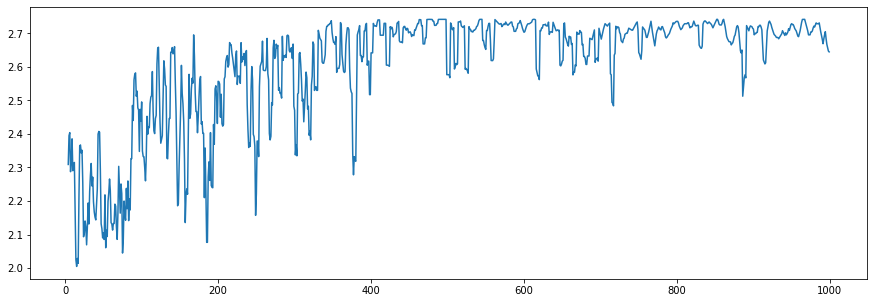

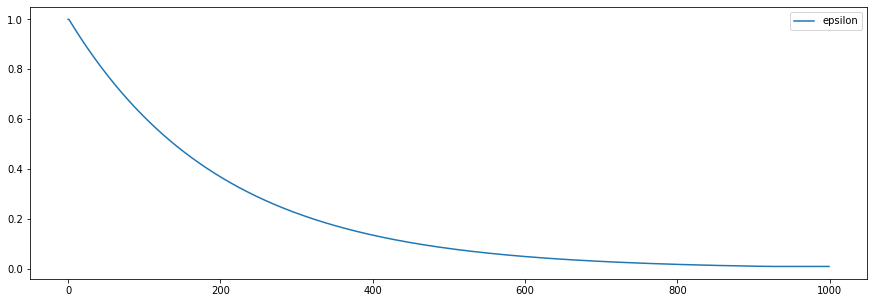

In [4]:
df = pd.DataFrame(history, columns =["episode", "epsilon",'rewards'])
df.set_index("episode")
df['rewards'].rolling(5).mean().plot(figsize=(15,5))
plt.show()

df[["epsilon"]].plot(figsize=(15,5))
plt.show()

In [15]:
pd.DataFrame(performance)

,year,action,reward
0,2001,0.2,-0.35173


<function matplotlib.pyplot.show(close=None, block=None)>

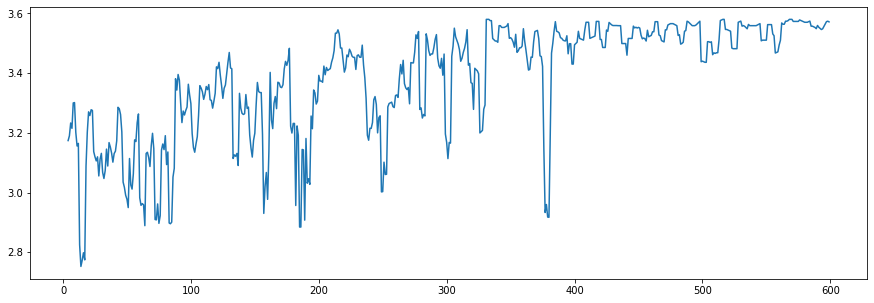

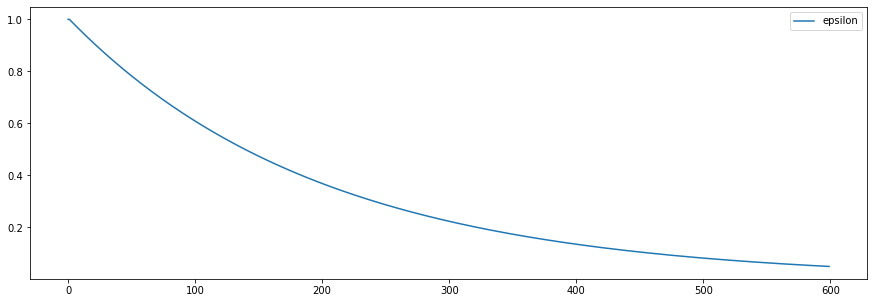

In [ ]:
df = pd.DataFrame(history, columns =["episode", "epsilon",'reward'])
df.set_index("episode")
df['reward'].rolling(5).mean().plot(figsize=(15,5))
plt.show

df[["epsilon"]].plot(figsize=(15,5))
plt.show